<a href="https://colab.research.google.com/github/ZiyadBastaili/Machine-Learning/blob/main/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing relevant libraries and datasets

In [1]:
# importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# reading train and test data
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#2. Data Visualisation and Cleaning
In this section, we will try to check the cleanliness of the data to understand how easily we can feed it to our ML algorithms

We shall also check the various descriptions of the columns to understand what they actually mean.
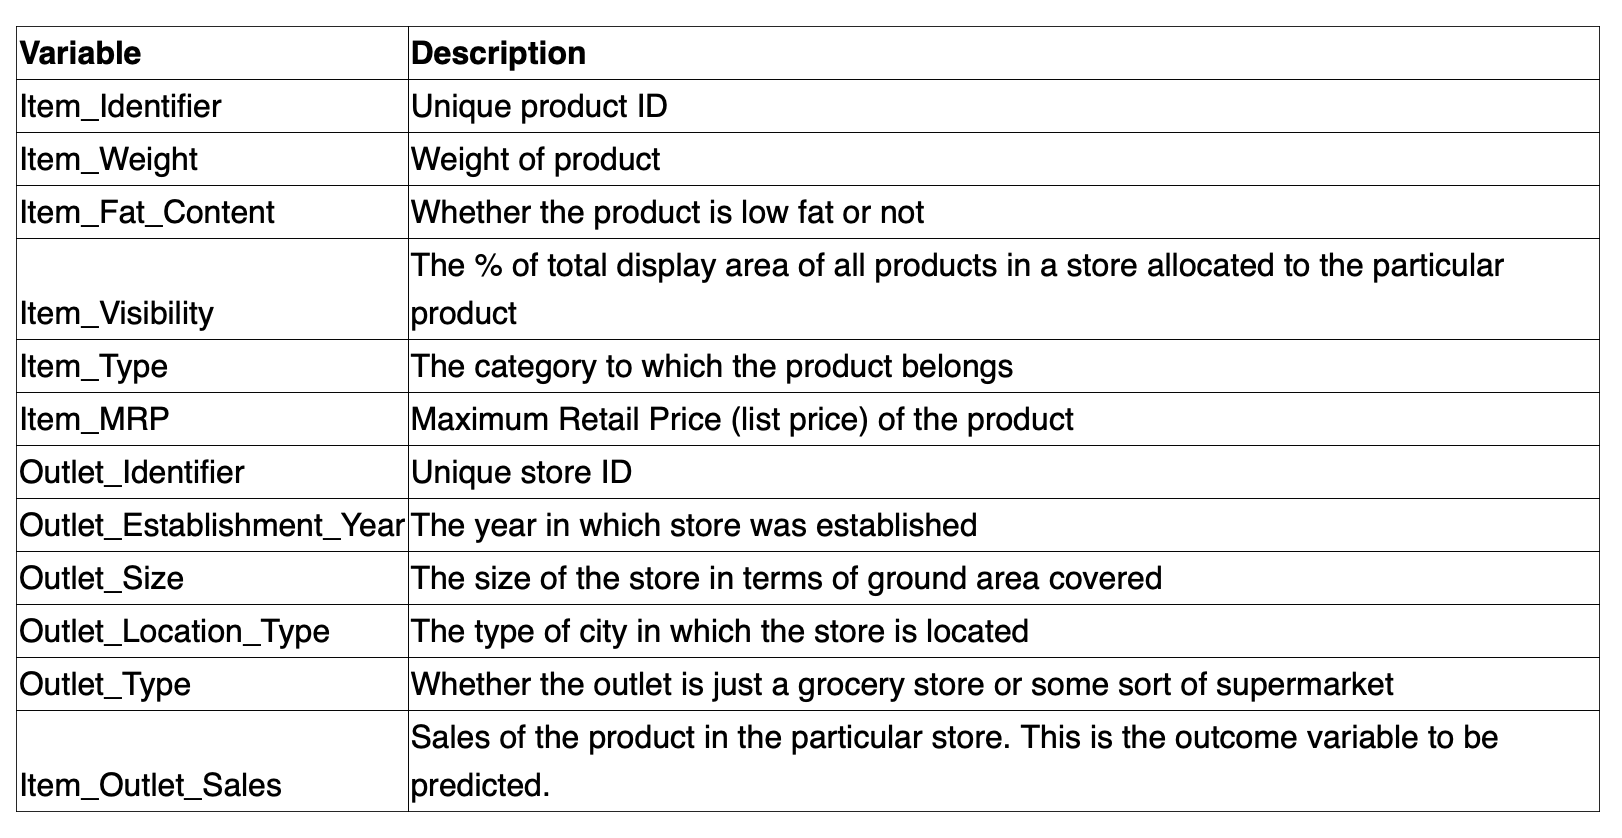

In [5]:
# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (8523, 12)
Shape of testing data : (5681, 11)


Upon eyeballing into the data, we see that we have various datatypes for each feature here. We will try to check each of them out one by one to understand how we should treat the bad values. First of all, let us check the various datatypes.

In [6]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Let us check the number of null values we have at the moment.

In [7]:
train_data.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [8]:
train_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

From the above, we see that only two columns have null values associated with them which are Item_Weight and Outlet_Size. Let us visualise it with a heatmap.

In [10]:
#train_data.dropna(inplace=True)
#test_data.dropna(inplace=True)
print(train_data.apply(lambda x: sum(x.isnull())))
print(test_data.apply(lambda x: sum(x.isnull())))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


a) Item Weight

In [11]:
train_data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


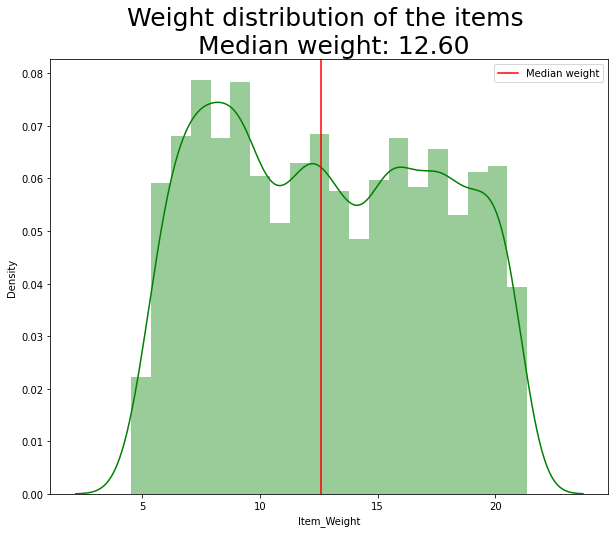

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Item_Weight'].dropna(),color='green')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(train_data['Item_Weight'].dropna().median()),size=25)
plt.axvline(train_data['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()

b) Item_Fat_Content


In [13]:
print(test_data['Item_Fat_Content'].unique())
print(test_data['Item_Type'].unique())
print(test_data['Outlet_Size'].unique())
print(test_data['Outlet_Type'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
['Medium' nan 'Small' 'High']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


We see bit of an issue in this column. Technically, we have only two unique values which are either low fat or regular. However, since the data entry has been done in separate ways, it is showing up as 5 unique values. Let us take care of it right now.

In [14]:
import plotly.express as px

df_train = train_data
df_train['Count']=1
df_fat=df_train.groupby('Item_Fat_Content')['Count'].sum().reset_index()

fig2=px.pie(df_fat,values='Count',names='Item_Fat_Content',hole=0.4)

fig2.update_layout(title='Fat content',title_x=0.48,
                  annotations=[dict(text='Fat',font_size=15, showarrow=False,height=800,width=900)])
fig2.update_traces(textfont_size=15,textinfo='percent+label')
fig2.show()

La colonne 'Item_Fat_Content' a des valeurs qui s'ecrient d'une façon diffirente mais elles sont les memes

In [15]:
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [16]:
print(test_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


Seems like we have solved the issue. Let us now visualise the number of items of each fat content.

In [17]:
df_train = train_data
df_train['Count']=1
df_fat=df_train.groupby('Item_Fat_Content')['Count'].sum().reset_index()

fig2=px.pie(df_fat,values='Count',names='Item_Fat_Content',hole=0.4)

fig2.update_layout(title='Fat content',title_x=0.48,
                  annotations=[dict(text='Fat',font_size=15, showarrow=False,height=800,width=900)])
fig2.update_traces(textfont_size=15,textinfo='percent+label')
fig2.show()

We see that about 64.7 % items are of low fat. This assumes that majority of customers are health conscious and prefer food with lower fat rating.

In [18]:
# train data
train_data[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             5517
Regular             3006
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



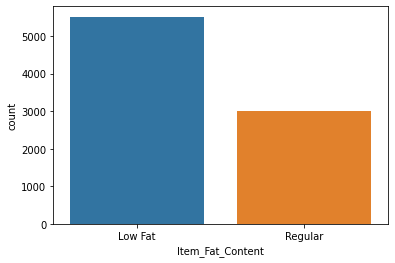

In [19]:
sns.countplot(train_data['Item_Fat_Content'])

c)Item_Visibility

In [20]:
train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



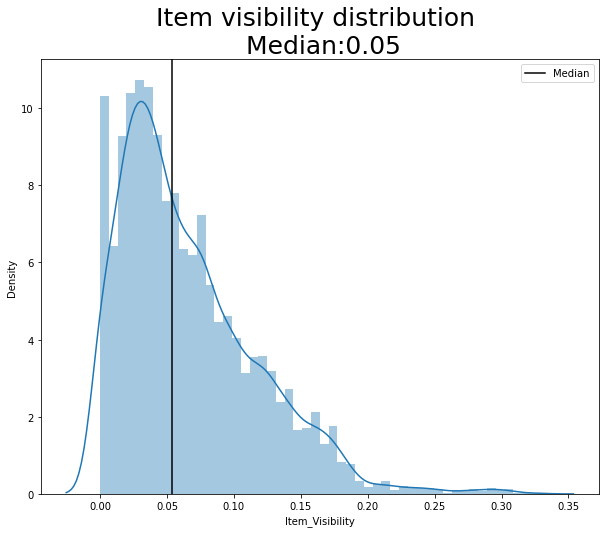

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(train_data['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(train_data['Item_Visibility'].median()),size=25)
plt.axvline(train_data['Item_Visibility'].median(),color='black',label='Median')
plt.legend()

d) Item_Type

In [22]:
!pip install --upgrade plotly

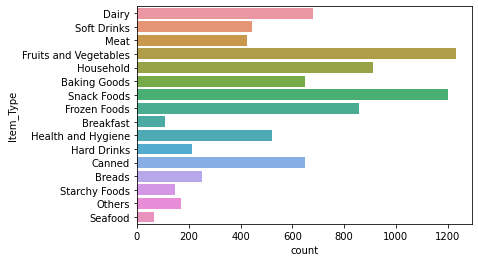

In [23]:
sns.countplot(y=train_data['Item_Type'])

In [24]:
df_type=df_train.groupby('Item_Type')['Count'].sum().reset_index()
fig4=px.sunburst(df_train,path=['Item_Type','Item_Fat_Content'],names='Item_Type',color_continuous_scale='RdBu')
fig4.update_layout(title='Item types',title_x=0.2,title_y=0.8,
                  annotations=[dict(showarrow=True,height=1000,width=900)],margin=dict(l=20, r=20, t=20, b=20))
fig4.show()

fig5=px.pie(df_type,values='Count',names='Item_Type')
fig5.update_layout(title='Item distribution',title_x=0.1,title_y=0.8)
fig5.update_traces(textfont_size=15,textinfo='percent')
fig5.show()

e) Item_MRP

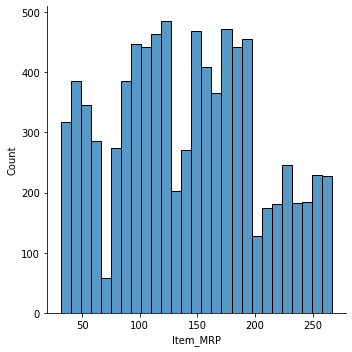

In [25]:
sns.displot(train_data['Item_MRP'],kind='hist')

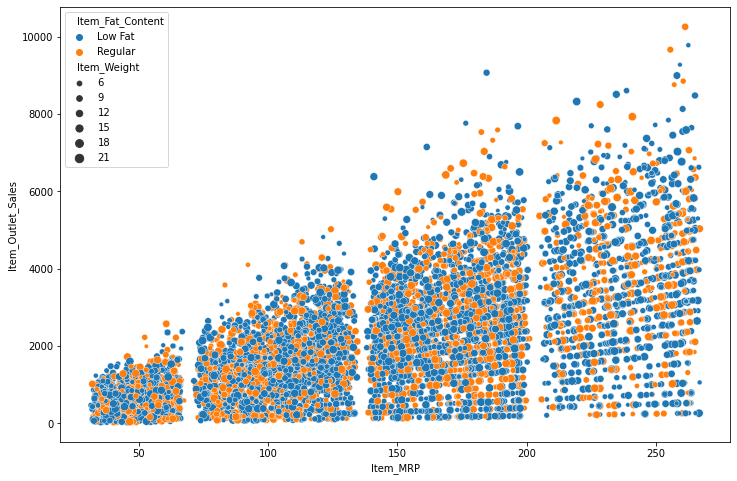

In [26]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



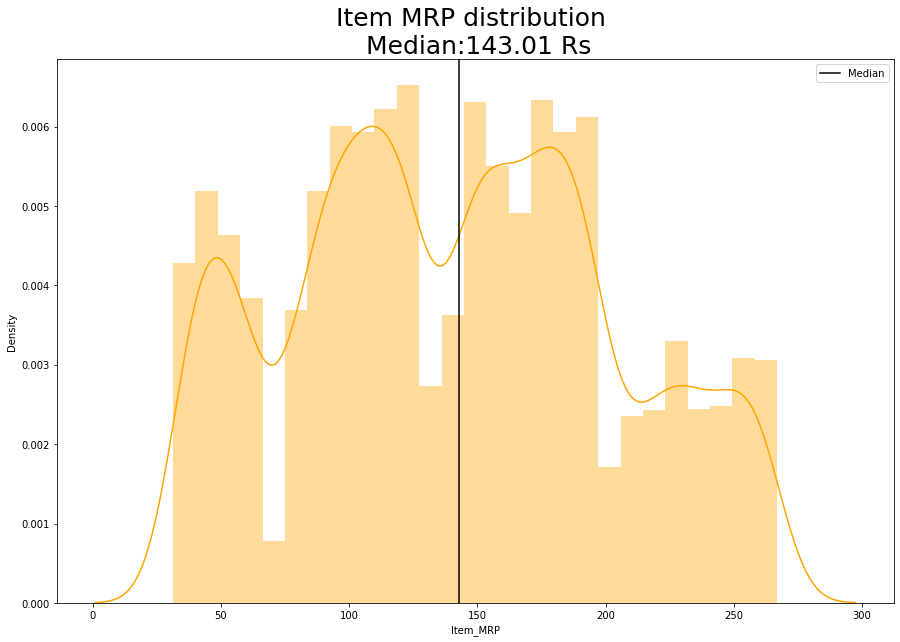

In [27]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(train_data['Item_MRP'].median()),size=25)
plt.axvline(train_data['Item_MRP'].median(),color='black',label='Median')
plt.legend()

As we can see, we don't have any clear distribution of the prices here. The distribution is multi modal in nature with mulitple peaks.

f) Outlet_Location_Type and Outlet_Type

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



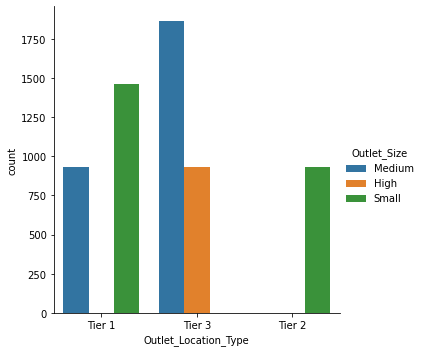

In [28]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

g) Correlation heatmap

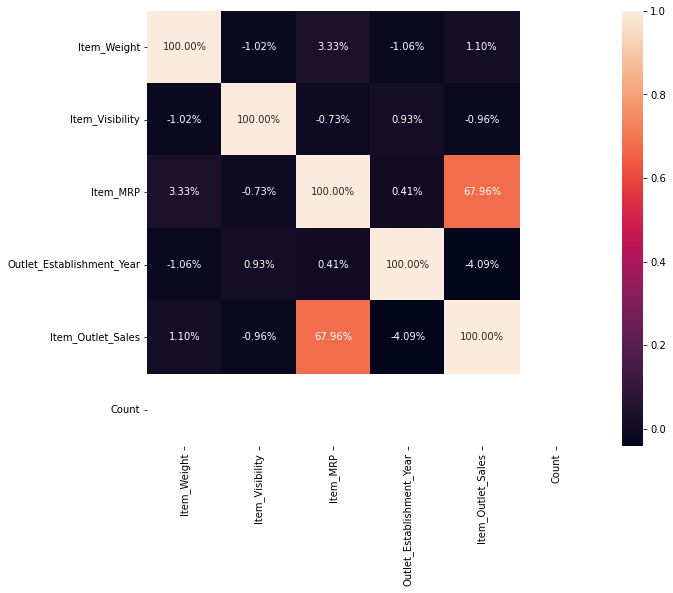

In [29]:
corrs=train_data.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

From the above, we can see that correlation of Item_Weight is extremely low. Hence, we can simply drop this column and get done with the issues of null values. We shall similarly remove the order_size as there is no way to deal with the null values here aswell. We would also get rid of the item_identifier and outlet_indetifier since it is of no consequence to us.

#3. Filling NAN Data

In [30]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace = True)
train_data['Outlet_Size'].fillna('Medium',inplace = True)    

test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace = True)
test_data['Outlet_Size'].fillna('Medium',inplace = True) 

# 4. Data Wrangling

Let us wrangle the data so that we can help make the dataframe into something that the ML algo can understand.

The main issue with the data given to us is the presence of categorical data. Let us handle these categorical data by using either label or one-hot encoding.

### Item_Fat_Content

Let us label the fat contents as

*   Low Fat: 1
*   Regular: 0


In [31]:
df_train = train_data

In [32]:
df_train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
df_train['Item_Fat_Content'].replace('Regular',0,inplace=True)

### Item_Type

Here, we have multiple number of item types and it'll be quite difficult for us to label the items individually. Instead, what we could do is we can use one-hot-encoding.

In [33]:
df_dummies_type=pd.get_dummies(df_train['Item_Type'])
df_train=df_train.merge(df_dummies_type,on=df_train.index)
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Item_Type',axis=1,inplace=True)

### Outlet_Location_Type

Let us encode the Tiers 1,2,3 as simple numericals 1,2 and 3.

In [34]:
df_train['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df_train['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

### Outlet_Type

We will use one-hot-encoding once more here.

In [35]:
df_dummies_outlet=pd.get_dummies(df_train['Outlet_Type'])
df_train=df_train.merge(df_dummies_outlet,on=df_train.index)
df_train.drop('key_0',axis=1,inplace=True)
df_train.drop('Outlet_Type',axis=1,inplace=True)

### Item_Outlet_Sales

This is the target section for us which we will try to predict. Hence, we shall separate it out from the rest of the dataframe.

In [36]:
targets=df_train['Item_Outlet_Sales']
df_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Count,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,1,0.016047,249.8092,OUT049,1999,Medium,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,0,0.019278,48.2692,OUT018,2009,Medium,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,1,0.016760,141.6180,OUT049,1999,Medium,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,0,0.000000,182.0950,OUT010,1998,Medium,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,1,0.000000,53.8614,OUT013,1987,High,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


As we can see, the above dataframe is now completely numerical in nature and can be used for ML algorithm.

# 5. Machine Learning

### A) Training phase

In [37]:
unn_cols=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    df_train.drop(cols,axis=1,inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
targets=train_data['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(df_train,targets,shuffle=True,test_size=0.2,random_state=0)

**Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

LinearRegression()

In [40]:
reg_lin.score(X_train,y_train)

0.5626590509272105

In [41]:
y_preds_lin=reg_lin.predict(X_test)

In [42]:
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

RMSE for Linear Regression:1132.89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Linear Regression \n RMSE: 1132.89')

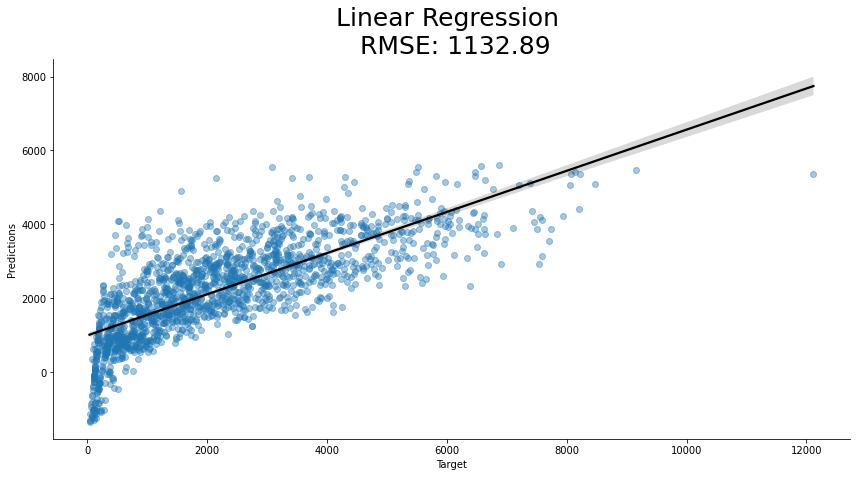

In [43]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds_lin

sns.lmplot('Target','Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

As we can see, the linear regression couldn't do a great job. The values are too scattered away from the black line which is the ideal region of the scatters. The RMSE is quite high too. Hence, it will definitely be a good option to check for regression techniques utilising a regularisation parameter such as Lasso and Ridge regression.

**Ridge Regression**

In [44]:
from sklearn.linear_model import RidgeCV
reg_rid=RidgeCV(cv=10)
reg_rid.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10)

In [45]:
reg_rid.score(X_train,y_train)

0.5626042157318232

In [46]:
y_preds_rid=reg_rid.predict(X_test)
rmse_rid=np.sqrt(mean_squared_error(y_preds_rid,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))

RMSE for Ridge Regression:1132.71


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ridge Regression \n RMSE: 1132.71')

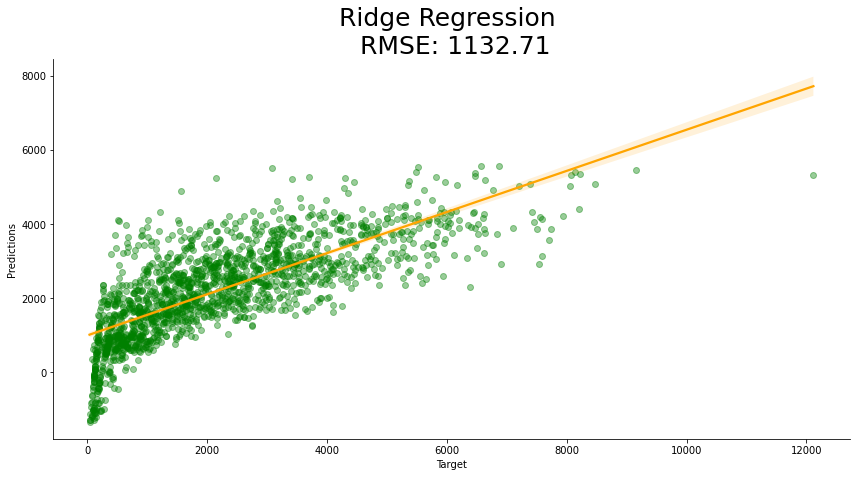

In [47]:
reg_rid_df=pd.DataFrame()
reg_rid_df['Target']=y_test
reg_rid_df['Predictions']=y_preds_rid

sns.lmplot('Target','Predictions',data=reg_rid_df,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_rid),size=25)

As we can see, both linear and ridge regression have performed quite similarly with nearly identical RMSE scores.

**Lasso Regression**

In [48]:
from sklearn.linear_model import Lasso
reg_las=Lasso()
reg_las.fit(X_train,y_train)

Lasso()

In [49]:
reg_las.score(X_train,y_train)

0.5624202280036026

In [50]:
y_preds_las=reg_las.predict(X_test)
rmse_las=np.sqrt(mean_squared_error(y_preds_las,y_test))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_las))

RMSE for Lasso Regression:1131.70


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Lasso Regression \n RMSE: 1131.70')

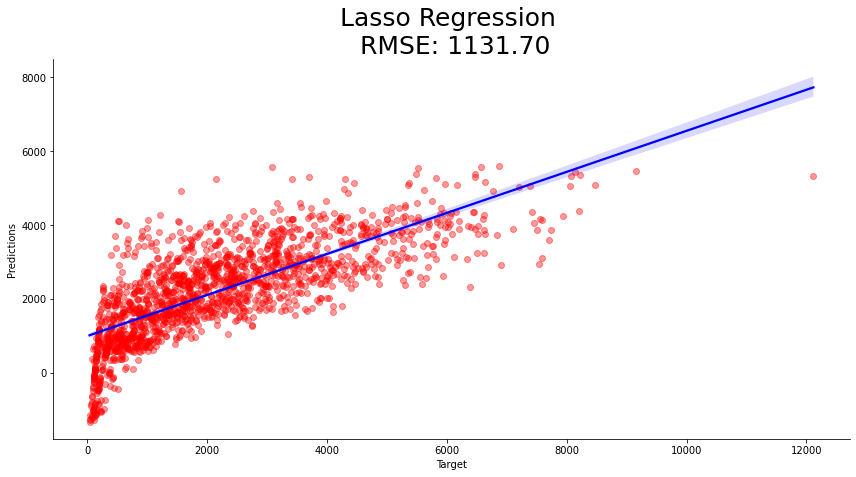

In [51]:
reg_las_df=pd.DataFrame()
reg_las_df['Target']=y_test
reg_las_df['Predictions']=y_preds_las

sns.lmplot('Target','Predictions',data=reg_las_df,height=6,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'red'})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_las),size=25)

**Polynomial Regression**

RMSE for Polynomial Regression:1132.89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



RMSE for Polynomial Regression:1086.60


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



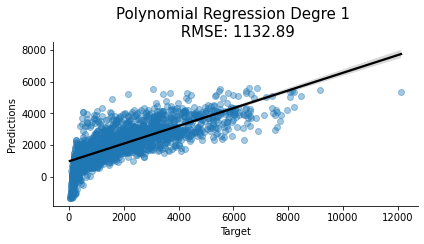

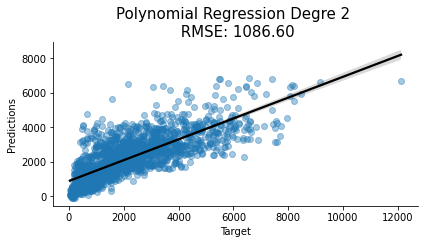

In [52]:
from sklearn.preprocessing import PolynomialFeatures
X_train,X_test,y_train,y_test=train_test_split(df_train,targets,shuffle=True,test_size=0.2,random_state=0)
for d in [1,2]:
    poly_reg = PolynomialFeatures(degree=d)

    X_poly = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.fit_transform(X_test)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)

    pol_reg.score(X_poly,y_train)

    y_preds_lin=pol_reg.predict(X_poly_test)

    rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
    print('RMSE for Polynomial Regression:{0:.2f}'.format(rmse_lin))

    reg_lin_df=pd.DataFrame()
    reg_lin_df['Target']=y_test
    reg_lin_df['Predictions']=y_preds_lin

    sns.lmplot('Target','Predictions',data=reg_lin_df,height=3,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
    plt.title('Polynomial Regression Degre '+str(d)+' \n RMSE: {0:.2f}'.format(rmse_lin),size=15)